## Using ADM on audio input

In [1]:
import wave
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, filtfilt
from scipy.io.wavfile import write

### Taking input audio file and getting required information

In [2]:
path = r'audios/input.wav'    # Path to audio file. It should be .wav format and mono channel
obj = wave.open(path, 'rb')
sample_freq = obj.getframerate()    
n_sample = obj.getnframes()       
signal_wave = obj.readframes(-1)
obj.close()

t_audio = n_sample/sample_freq

print('No. of samples in the audio file is: ', n_sample)
print('Sampling frequency is: ', sample_freq)
print('Duration of audio file is: ', t_audio)

No. of samples in the audio file is:  96
Sampling frequency is:  48000
Duration of audio file is:  0.002


#### Plotting input samples

[]

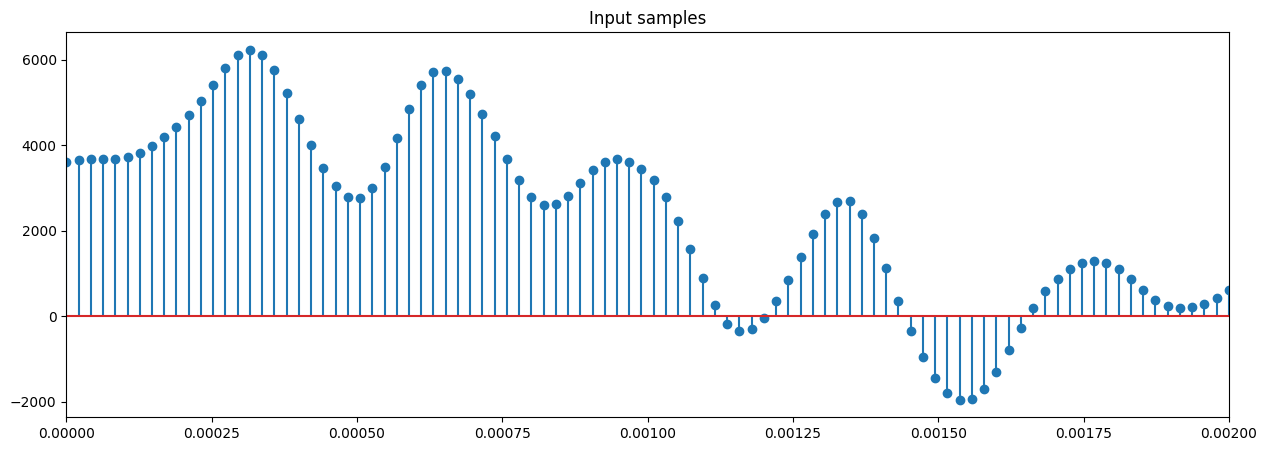

In [3]:
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
times = np.linspace(0, t_audio, num=n_sample)
delta = np.max(signal_array) / 42

# Plotting input samples
plt.figure(figsize=(15, 5))
plt.title('Input samples')
plt.xlim(0, t_audio)
plt.stem(times, signal_array)
plt.plot()

In [4]:
# Array to store the modulated samples
modulated_signal = [0]

bitstream = [0]

k1 = k2 = 0
for i in range(1, len(signal_array)):
    if signal_array[i]-modulated_signal[i-1] > 0:  
        k1+=1
        k2 = 0
        modulated_signal.append(modulated_signal[i-1]+delta*k1)
        bitstream.append(1)
    else:
        k1 = 0
        k2 += 1
        modulated_signal.append(modulated_signal[i-1]-delta*k2)
        bitstream.append(0)

#### Plotting modulated samples and input wave together

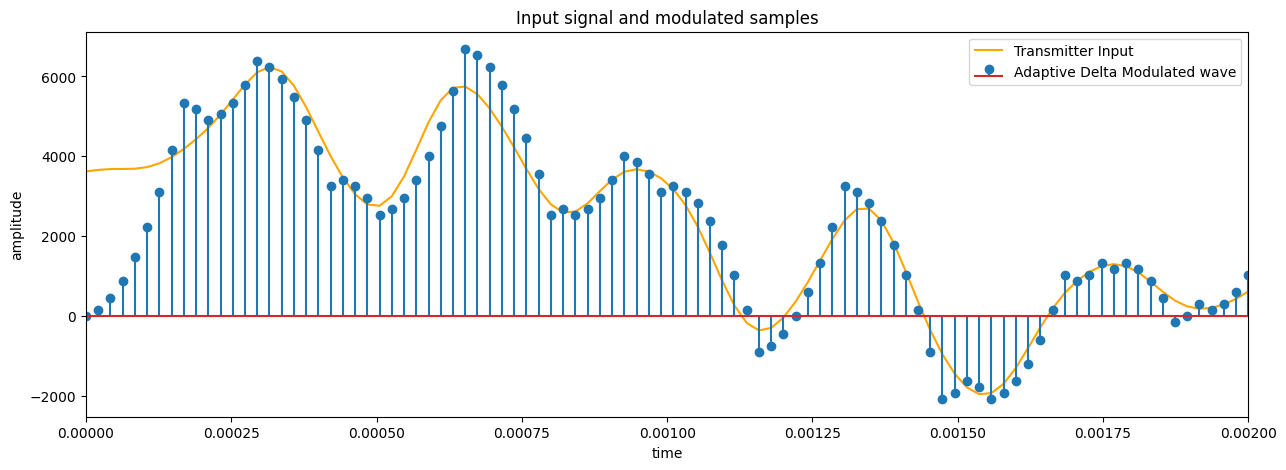

In [5]:
plt.figure(figsize=(15, 5))
plt.xlim(0, t_audio)
plt.plot(times, signal_array, color = 'orange')
plt.stem(times, modulated_signal)
plt.title('Input signal and modulated samples')
plt.legend(['Transmitter Input', 'Adaptive Delta Modulated wave'])
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

#### Plotting the PCM wave

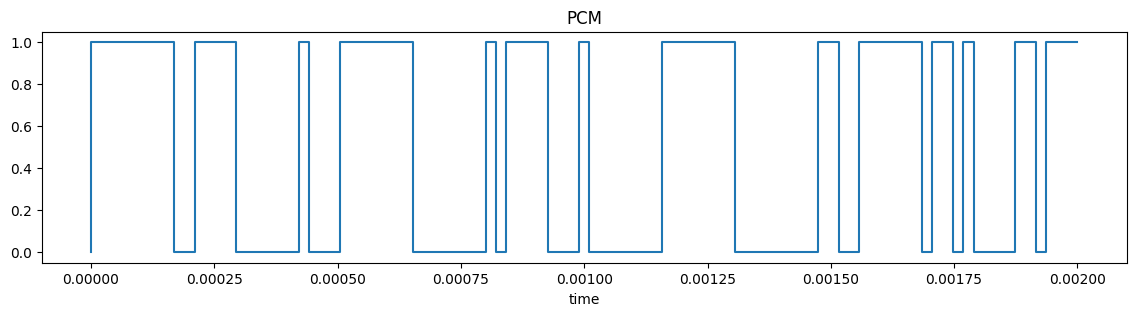

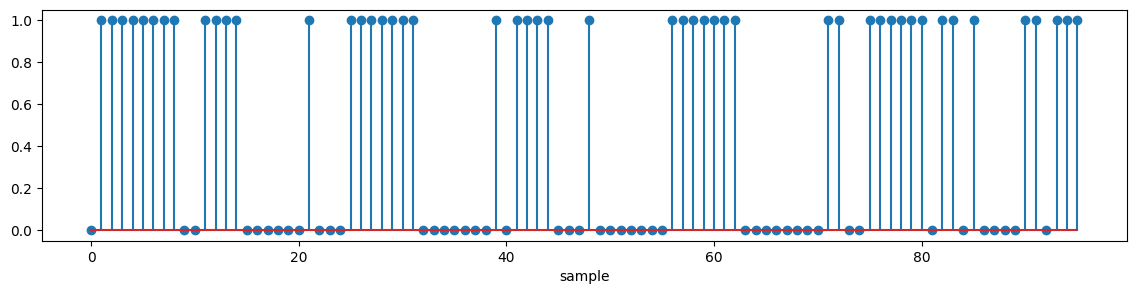

In [6]:
plt.figure(figsize=(14,3))
plt.title('PCM')
plt.xlabel('time')
plt.step(times, bitstream)
plt.show()

plt.figure(figsize=(14,3))
plt.xlabel('sample')
plt.stem(bitstream)
plt.show()

In [7]:
# Array to store the reconsturced modulated samples
rec = [0]

k1 = k2 = 0
for i in range(1, len(bitstream)):
    if bitstream[i] == 1:
        k1 += 1
        k2 = 0
        rec.append(rec[i-1]+delta*k1)
    else:
        k1 = 0
        k2 += 1
        rec.append(rec[i-1]-delta*k2)

#### Plotting reconstructed ADM wave

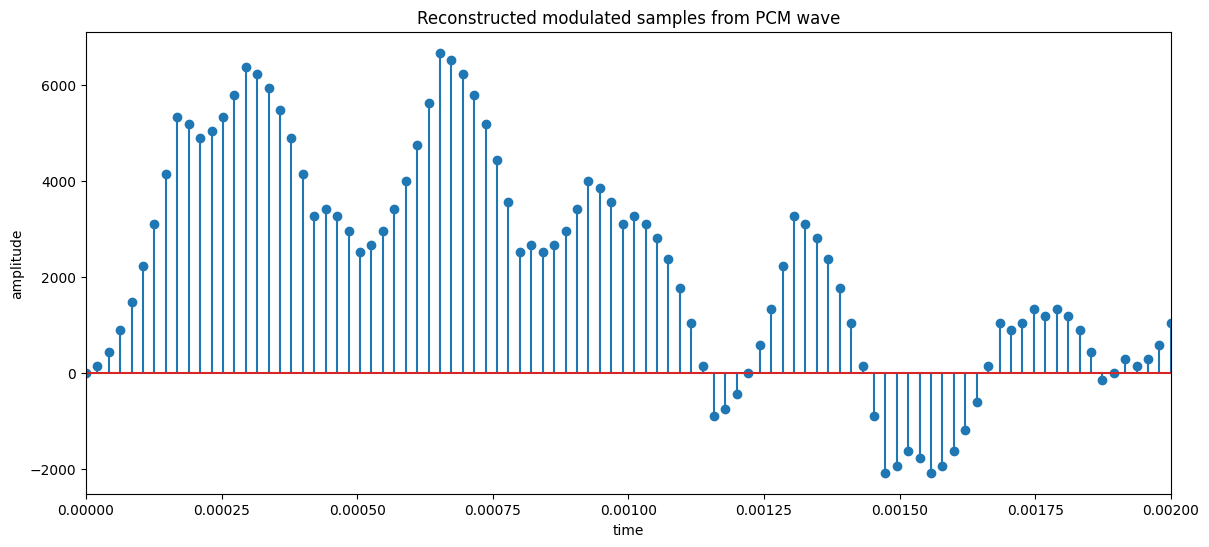

In [8]:
plt.figure(figsize=(14,6))
plt.title('Reconstructed modulated samples from PCM wave')
plt.stem(times, rec)
plt.xlim(0, t_audio)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

### Performing low pass filtering and storing the final audio

In [9]:
# Passing through LPF
nr, dr = butter(1, 0.2)
filteredOutput = filtfilt(nr, dr, rec)

# Recreating the audio file from the final array
final_audio = np.int16(filteredOutput/np.max(np.abs(filteredOutput)) * 32767)
write('ouput.wav', 44100, final_audio)

#### Plotting the final singal along with input singal

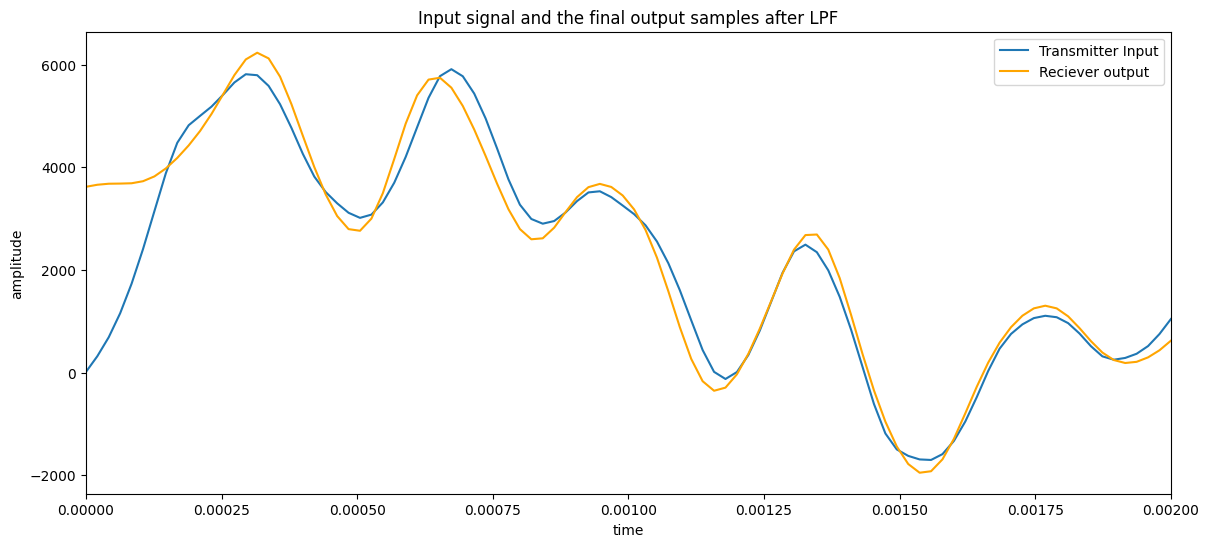

In [10]:
plt.figure(figsize=(14,6))
plt.plot(times, filteredOutput)
plt.plot(times, signal_array, color = 'orange')
plt.xlim(0, t_audio)
plt.title('Input signal and the final output samples after LPF')
plt.legend(['Transmitter Input', 'Reciever output'])
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()